In [1]:
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.svm import SVC

In [2]:
# read csv
train_data = pd.read_csv('./data/reduced_train.csv')
test_data = pd.read_csv('./data/reduced_test.csv')

In [3]:
# label the sentiments
encoded_labels = preprocessing.LabelEncoder()

train_labels = encoded_labels.fit_transform(train_data['sentiment'])
test_labels = encoded_labels.fit_transform(test_data['sentiment'])

In [4]:
# TF-IDF
tfidf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word',
                        token_pattern=r'\w{1,}',
                        ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1, stop_words='english')

tfidf.fit(list(train_data['tweet']) + list(test_data['tweet']))

train_features = tfidf.transform(train_data['tweet'])
test_features = tfidf.transform(test_data['tweet'])

In [5]:
# SVD
svd = TruncatedSVD(n_components=300)
svd.fit(train_features)

train_features = svd.transform(train_features)
test_features = svd.transform(test_features)

In [6]:
# Normalize data with StandardScaler
scaler = preprocessing.StandardScaler()
scaler.fit(train_features)

train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [7]:
# SVC model
svc = SVC(C=1.0, probability=True)

svc.fit(train_features, train_labels)

# predict
predictions = svc.predict(test_features)

In [8]:
from sklearn.metrics import accuracy_score

# calculate f1 score
f1 = f1_score(test_labels, predictions, average='weighted')
print(f1)
print("Accuracy", accuracy_score(test_labels, predictions))

0.6160597417110227
Accuracy 0.6164658634538153


In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
import seaborn as sns
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    try:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title, fontsize=30)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
      plt.yticks(tick_marks, classes, fontsize=22)

      fmt = '.2f'
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

      plt.ylabel('True label', fontsize=25)
      plt.xlabel('Predicted label', fontsize=25)
    except Exception as e:
      print(e)

[[ 81  62  34]
 [  4 117  18]
 [  8  65 109]]


<AxesSubplot:>

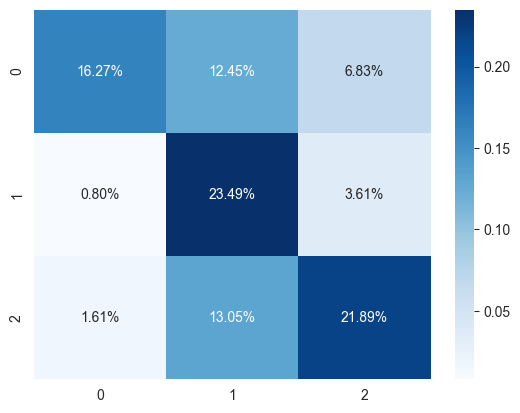

In [20]:
cnf_matrix = confusion_matrix(test_labels, predictions)
print(cnf_matrix)

# plot confusion matrix
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Blues')